In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks, spectrogram
import pandas as pd

Playing around with signal data:

In [130]:
def transform(signal, T, positive_only=True):
    """ 
    Returns frequencies and amplitudes of transformation domain and range
    """
    N = len(signal)
    e = np.fft.fft(signal) / N
    e = np.abs(e)
    f = np.fft.fftfreq(N, T)
    
    if positive_only:
        e = e[range(int(N / 2))]
        f = f[range(int(N / 2))]
    
    return e,f

def get_waves(amps, freqs, period, rate, time):
    """
    Generate sine waves with given frequency and amplitude.
    """
    N = rate * time
    t_vec = np.arange(N) * period
    
    waves = []
    for f, a in zip(freqs, amps):
        waves.append(a * np.sin(2 * np.pi * f * t_vec)) 
    
    return waves
        
def decompose(signal, s_period, s_rate, s_time, threshold=None):
    """
    Decompose and return the individual components of a composite wave form.
    Plot each component wave. 
    """
    es, fs  = transform(signal, s_period)
    idxs, _ = find_peaks(es, threshold=threshold)
    
    amps, freqs = es[idxs], fs[idxs]
    
    plt.plot(fs, es, 'b.--', label='Energy')
    plt.plot(fs[idxs], es[idxs], 'ro', label=f'Peak Frequencies:\n{fs[idxs]}')
    plt.xlabel('Frequency')
    plt.gca().set_xscale('log')
    plt.legend(), plt.grid()
    plt.show()
    
    return get_waves(amps, freqs, s_period, s_rate, s_time)

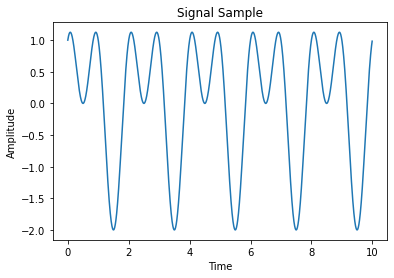

In [131]:
# Create composite of two waves with frequencies f1 and f2
f1 = 1 
f2 = .5

# Sample Frequency, Period, and time of sample
Sf = 200
T = 1/Sf
t = 10

# 'Sample' wave signal:
N = Sf * t
t_vec = np.arange(N) * T
y = np.cos(f1 * 2 * np.pi * t_vec) + np.sin(f2 * 2 * np.pi * t_vec)

plt.plot(t_vec, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal Sample')
plt.show()

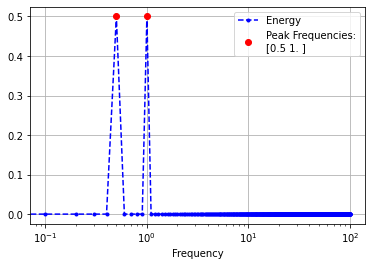

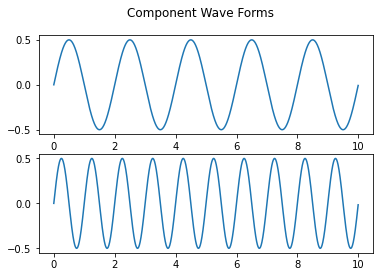

In [132]:
waves = decompose(y, T, Sf, t, threshold=.1)

fig, axes = plt.subplots(len(waves), 1)
fig.suptitle('Component Wave Forms')
for i, w in enumerate(waves):
    axes[i].plot(t_vec, w)
plt.show()

Using `scipy.signals` to get spectrogram of a signal:

In [133]:
# Signal sampling rate, period and window time:
Fs = 1000
T = 1/Fs
window = 0.1
duration = 3

# Points per window:
M = int(Fs * window)

# Points for entire signal:
N = int(Fs * duration)

# Natural frequency values
f1 = 128
f2 = 256
f3 = 512

w_func = np.hamming(M)
# print(f'window func len: {len(w_func)}')

t_vec = np.arange(N)*T
signal = np.sin(2 * np.pi * f1 * t_vec) + \
         np.sin(2 * np.pi * f2 * t_vec) + \
         np.sin(2 * np.pi * f3 * t_vec)

f, t, Sxx = spectrogram(signal, fs=Fs)
f.shape, t.shape, Sxx.shape

((129,), (13,), (129, 13))

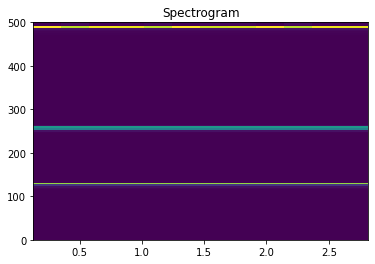

In [134]:
plt.pcolormesh(t, f, Sxx)
plt.title('Spectrogram')
plt.show()

My own attempt at a spectrogram:

In [138]:
# (frequencies, time bins)
fourier_data = np.array([[],[]])

times = []
frequencies = []
amplitudes = []

# move sliding window over signal, calculate FFT for each window.
for t in np.arange(window, duration, window):
    t_vec = np.linspace(t - window, t, M, endpoint=False)
    signal = np.sin(2 * np.pi * f1 * t_vec) + \
             np.sin(2 * np.pi * f2 * t_vec) + \
             np.sin(2 * np.pi * f3 * t_vec)
    
    transform = np.fft.fft(signal * w_func) / M
    amplitude = np.abs(transform)[range(int(M / 2))]
    freqs = np.fft.fftfreq(N, T)[range(int(M / 2))]
    times.append(t)
    frequencies.append(freqs)
    amplitudes.append(amplitude)
    
    

In [142]:
amplitudes = np.array(amplitudes)
frequencies = np.array(frequencies)
times = np.array(times)
amplitudes.shape, frequencies.shape, times.shape

((29, 50), (29, 50), (29,))

In [141]:
times

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])